<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [ ]:
#!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### Install the required libraries and import them


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [2]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [3]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [5]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [6]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)


Text(0.5, 1.0, 'Distribution of Yearly Compensation')

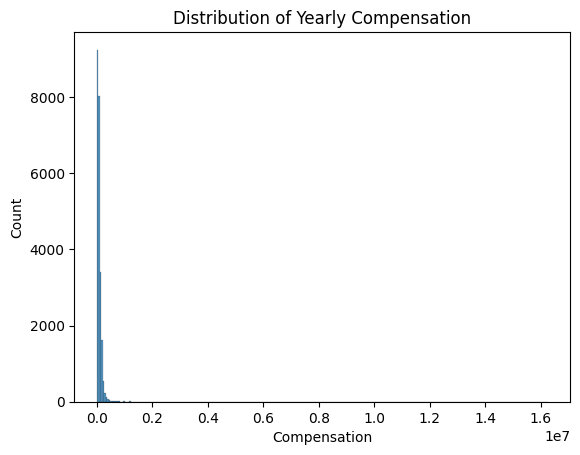

In [14]:
import seaborn as sns
# CompTotal includes different currencies, not meaningful; instead use ConvertedCompYearly
sns.histplot(df['ConvertedCompYearly'])
plt.xlabel('Compensation')
plt.title('Distribution of Yearly Compensation')

Stats of ConvertedCompYearly: count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
μ + 3σ: 646426.2065215341
IQR = Q3 - Q1 = 107971.5 - 32712.0 = 75259.5
Q1 - 1.5 IQR = -80177.25
Q3 + 1.5 IQR = 220860.75


Text(0.5, 1.0, 'Compensation Distribution (excluding outliers > μ+3σ)')

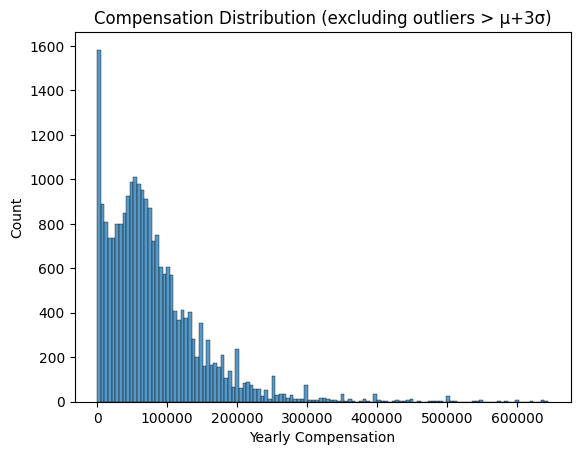

In [69]:
# removing extreme outliers
stats = df['ConvertedCompYearly'].describe()
print('Stats of ConvertedCompYearly:', stats)

# 3σ threshold
threshold = stats['mean']+stats['std']*3
print('μ + 3σ:', threshold)

# Q3+1.5IQR threshold
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(f'IQR = Q3 - Q1 = {Q3} - {Q1} = {IQR}')
print('Q1 - 1.5 IQR =', lower_bound)
print('Q3 + 1.5 IQR =', upper_bound)

# removing outliers above mean plus 3 sigmas
sns.histplot(df[df['ConvertedCompYearly'] < threshold]['ConvertedCompYearly'])
plt.xlabel('Yearly Compensation')
plt.title('Compensation Distribution (excluding outliers > μ+3σ)')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


In [19]:
#df['YearsCodePro'].value_counts()
df['YearsCodePro'].dtypes

dtype('O')

Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


Text(0.5, 1.0, 'Experience Distribution')

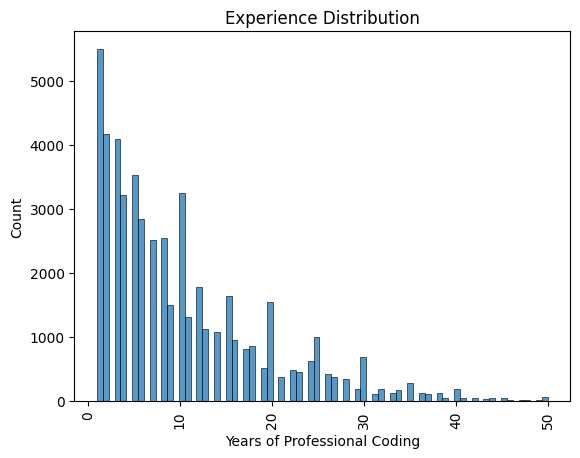

In [70]:
## Write your code here
# convert categorical ('O') column YearsCodePro into numerical years
df['CodingYears'] = df['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
sns.histplot(df['CodingYears'])
plt.xticks(rotation=90)
plt.xlabel('Years of Professional Coding')
plt.title('Experience Distribution')

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


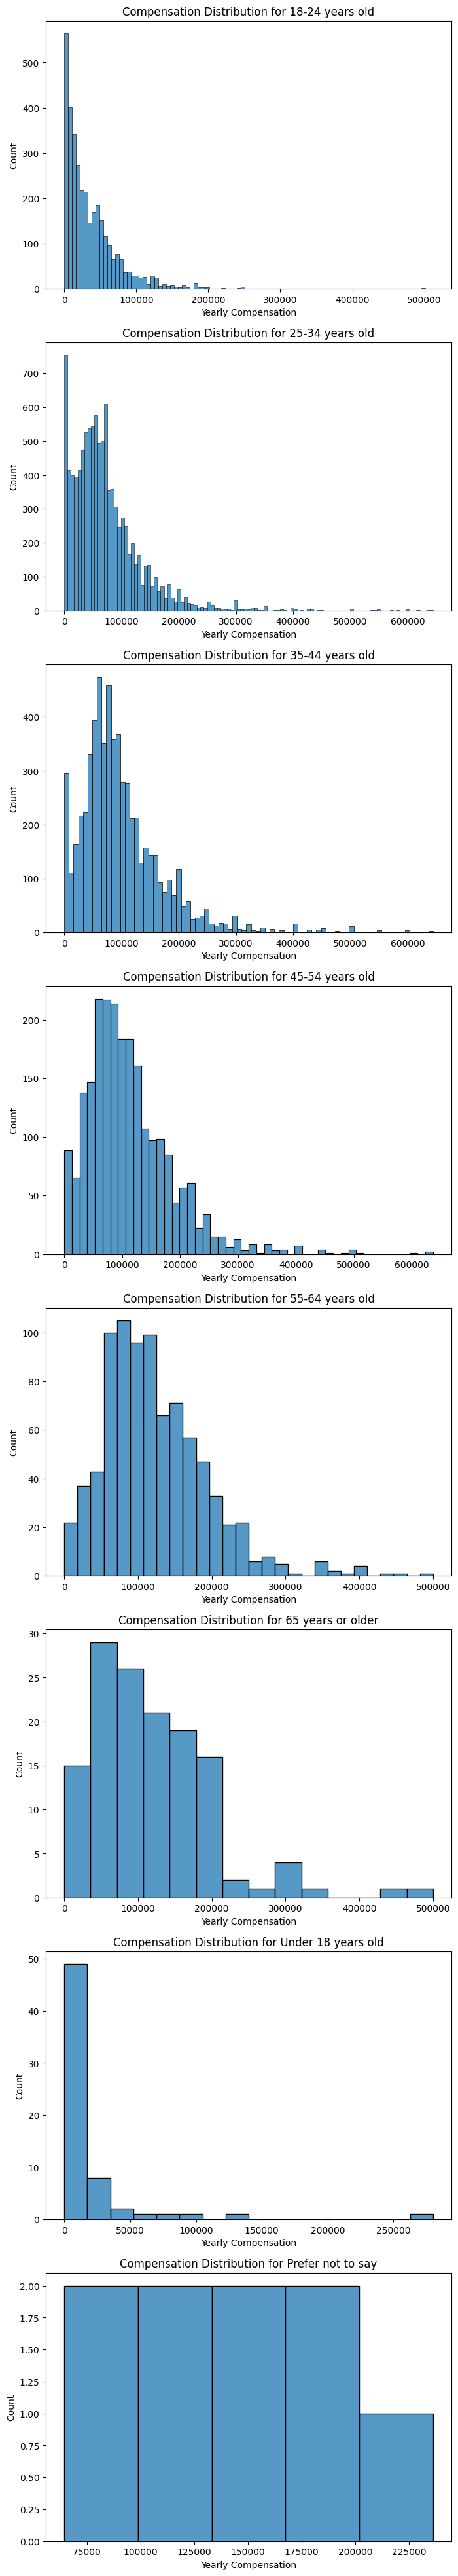

In [62]:
## Write your code here
# display histograms excluding outliers
df2 = df[df['ConvertedCompYearly'] < threshold]
a_groups = list(df2['Age'].unique())
total = len(a_groups)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(8, 50))
for idx, name in zip(list(range(total)), a_groups):
    sns.histplot(df2[df2['Age'] == name]['ConvertedCompYearly'], ax=axes[idx])
    axes[idx].set_xlabel('Yearly Compensation')
    axes[idx].set_title(f'Compensation Distribution for {name}')
    axes[idx].tick_params(axis='x', rotation=0)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [27]:
## Write your code here
df['TimeSearching'].unique()

array([None, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

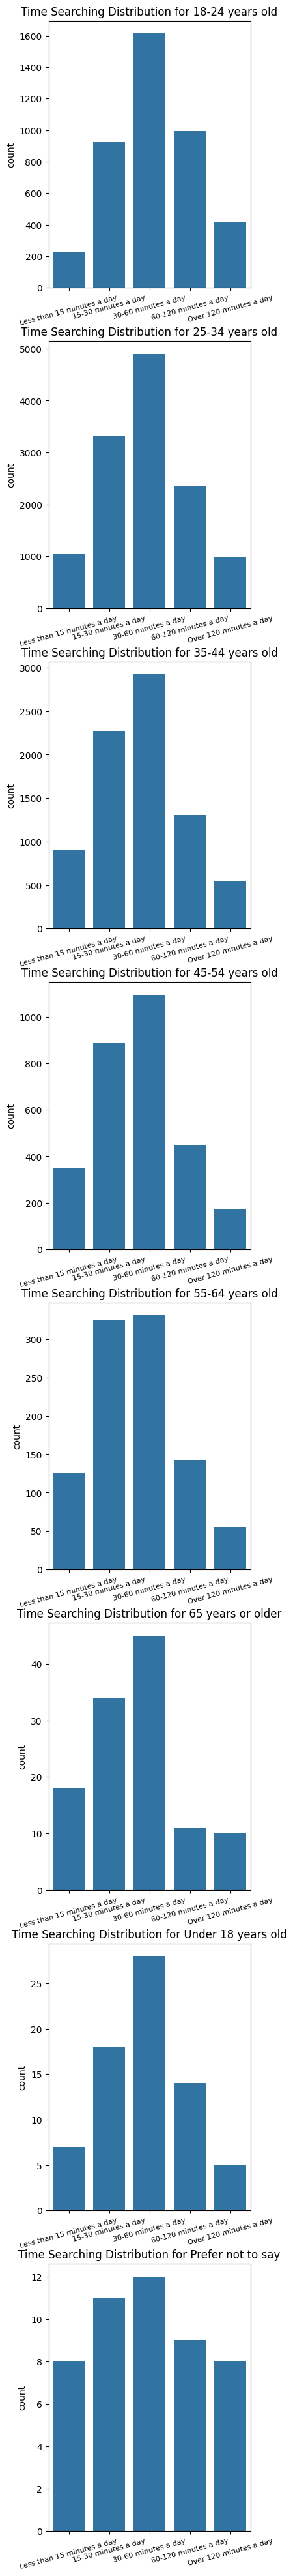

In [45]:
# for showing the TimeSearching groups in a meaningful order
reorder_index = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day',
]
#fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(8, 60))
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(4, 50))
for idx, name in zip(list(range(total)), a_groups):
    sns.barplot(df[df['Age'] == name]['TimeSearching'].value_counts().reindex(reorder_index), ax=axes[idx])
    axes[idx].set_xlabel('')
    axes[idx].set_title(f'Time Searching Distribution for {name}')
    axes[idx].tick_params(axis='x', rotation=15, labelsize=8)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


Text(0.5, 1.0, 'Distribution of Most Desired Databases')

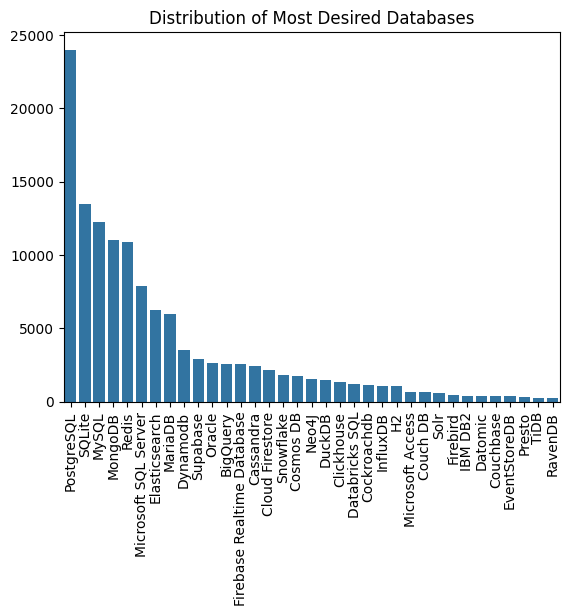

In [51]:
## Write your code here
# one-hot encode the DatabaseWantToWorkWith column
df_encoded = df['DatabaseWantToWorkWith'].str.get_dummies(sep=';')
top5db = df_encoded.sum().sort_values(ascending=False).head()
sns.barplot(df_encoded.sum().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title('Distribution of Most Desired Databases')

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


Text(0.5, 1.0, 'Distribution of Remote Work Arrangements')

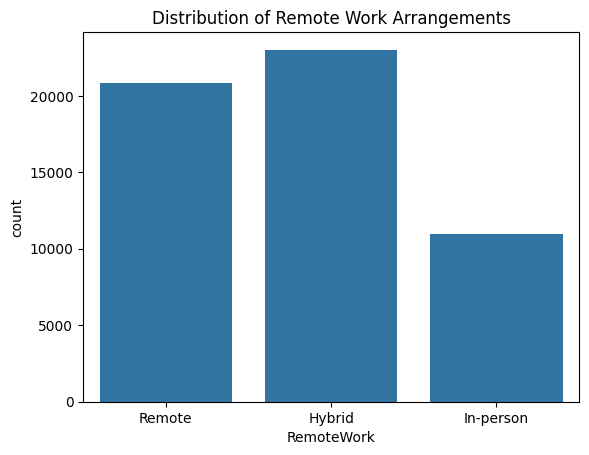

In [48]:
## Write your code here
sns.barplot(df['RemoteWork'].value_counts().reindex(['Remote', 'Hybrid', 'In-person']))
plt.title('Distribution of Remote Work Arrangements')

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


Text(0.5, 0, 'Yearly Compensation')

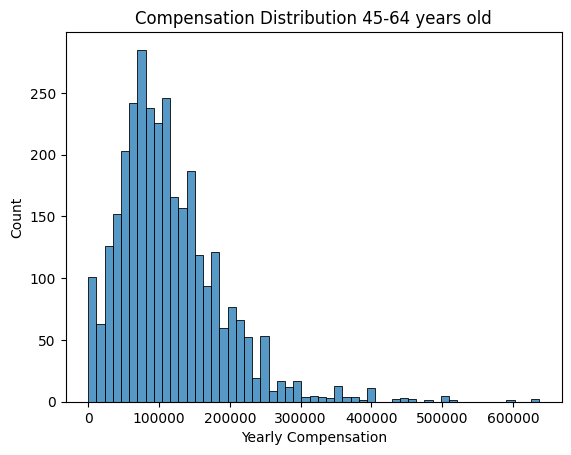

In [58]:
## Write your code here
sns.histplot(df2[(df2['Age'] == '45-54 years old') | (df2['Age'] == '55-64 years old')]['ConvertedCompYearly'])
plt.title('Compensation Distribution 45-64 years old')
plt.xlabel('Yearly Compensation')

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


C:\Users\clifford\AppData\Local\Temp\ipykernel_18308\3823125352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Experience'] = pd.cut(df2['CodingYears'], bins, labels=ranges)
C:\Users\clifford\AppData\Local\Temp\ipykernel_18308\3823125352.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Mean of JobSat scores\n', df2.groupby('Experience')['JobSat'].mean())


Number of JobSat scores
 Experience
0-5      8664
5-10     6283
10-15    3345
15-20    2105
20-25    1266
25-30     849
30-35     374
35-40     245
40-45      88
45-50      38
Name: count, dtype: int64
Mean of JobSat scores
 Experience
0-5      6.673410
5-10     6.917827
10-15    7.101138
15-20    7.053091
20-25    7.206406
25-30    7.338521
30-35    7.468468
35-40    7.647887
40-45    7.607843
45-50    7.818182
Name: JobSat, dtype: float64


Text(0, 0.5, 'Satisfaction')

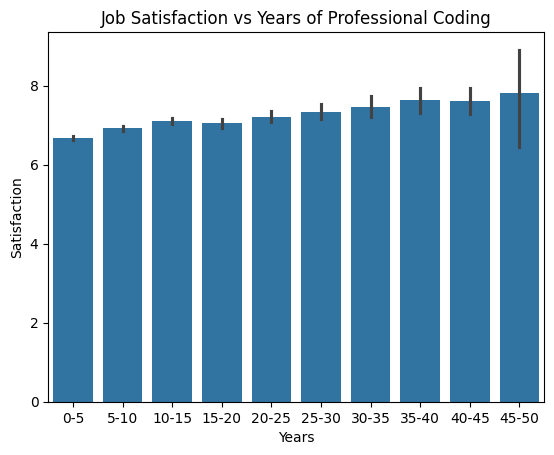

In [67]:
## Write your code here
df.groupby('YearsCodePro')['JobSat'].mean()

# Define custom bin edges and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
ranges = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']

# Apply binning and add the results to a new column
df2['Experience'] = pd.cut(df2['CodingYears'], bins, labels=ranges)
print('Number of JobSat scores\n', df2['Experience'].value_counts())
print('Mean of JobSat scores\n', df2.groupby('Experience')['JobSat'].mean())
sns.barplot(data=df2, x='Experience', y='JobSat')
plt.title('Job Satisfaction vs Years of Professional Coding')
plt.xlabel('Years')
plt.ylabel('Satisfaction')

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [68]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
